In [194]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [172]:
train = pd.read_csv("/workspaces/AITemplate/Kaggle/SpaceTitanic/Data/train.csv")
test = pd.read_csv("/workspaces/AITemplate/Kaggle/SpaceTitanic/Data/test.csv")
train.head()
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [173]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [174]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [175]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [176]:
train["HomePlanet"].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [177]:
train["Destination"].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [178]:
train["HomePlanet"] = train["HomePlanet"].fillna(0).map({"Earth": 1, "Europa": 2, "Mars": 3})
test["HomePlanet"] = test["HomePlanet"].fillna(0).map({"Earth": 1, "Europa": 2, "Mars": 3})

train["CryoSleep"] = train["CryoSleep"].fillna(-1).map({False: 0, True: 1})
test["CryoSleep"] = test["CryoSleep"].fillna(-1).map({False: 0, True: 1})

train["VIP"] = train["VIP"].fillna(-1).map({False: 0, True: 1})
test["VIP"] = test["VIP"].fillna(-1).map({False: 0, True: 1})

train["Destination"] = train["Destination"].fillna(0).map({"TRAPPIST-1e": 1, "55 Cancri e": 2, "PSO J318.5-22": 3})
test["Destination"] = test["Destination"].fillna(0).map({"TRAPPIST-1e": 1, "55 Cancri e": 2, "PSO J318.5-22": 3})

In [179]:
test["Age"] = test["Age"]/train["Age"].max()
test["HomePlanet"] = test["HomePlanet"]/train["HomePlanet"].max()
test["Destination"] = test["Destination"]/train["Destination"].max()
test["ShoppingMall"] = test["ShoppingMall"]/train["ShoppingMall"].max()
test["FoodCourt"] = test["FoodCourt"]/train["FoodCourt"].max()
test["RoomService"] = test["RoomService"]/train["RoomService"].max()
test["Spa"] = test["Spa"]/train["Spa"].max()
test["VRDeck"] = test["VRDeck"]/train["VRDeck"].max()

train["Age"] = train["Age"]/train["Age"].max()
train["HomePlanet"] = train["HomePlanet"]/train["HomePlanet"].max()
train["Destination"] = train["Destination"]/train["Destination"].max()
train["ShoppingMall"] = train["ShoppingMall"]/train["ShoppingMall"].max()
train["FoodCourt"] = train["FoodCourt"]/train["FoodCourt"].max()
train["RoomService"] = train["RoomService"]/train["RoomService"].max()
train["Spa"] = train["Spa"]/train["Spa"].max()
train["VRDeck"] = train["VRDeck"]/train["VRDeck"].max()

train.drop(["Name", "PassengerId"], axis=1, inplace=True)
test.drop(["Name"], axis=1, inplace=True)

train.dropna(inplace=True)
test.dropna(inplace=True)

In [180]:
train.describe()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000
mean,0.555342,0.351863,0.467475,0.365790,0.024246,0.015664,0.016092,0.007683,0.014006,0.012620
std,0.265748,0.477587,0.218525,0.183919,0.153823,0.045233,0.056248,0.027160,0.050830,0.046695
min,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.333333,0.240506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.333333,0.000000,0.333333,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,1.000000,0.666667,0.481013,0.000000,0.003560,0.002750,0.001288,0.002957,0.002155
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.692399,1.000000,1.000000,1.000000,0.842664


In [181]:
test.describe()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000
mean,0.561649,0.371386,0.460805,0.361980,0.017884,0.015276,0.014639,0.007452,0.013348,0.012273
std,0.270823,0.483247,0.216460,0.178931,0.132549,0.042883,0.049592,0.024226,0.048697,0.048121
min,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.333333,0.240506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.333333,0.000000,0.333333,0.329114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,1.000000,0.666667,0.468354,0.000000,0.003699,0.002616,0.001107,0.002120,0.001409
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.807357,0.697984,0.352971,0.702115,0.790867


In [182]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6764 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6764 non-null   float64
 1   CryoSleep     6764 non-null   float64
 2   Cabin         6764 non-null   object 
 3   Destination   6764 non-null   float64
 4   Age           6764 non-null   float64
 5   VIP           6764 non-null   float64
 6   RoomService   6764 non-null   float64
 7   FoodCourt     6764 non-null   float64
 8   ShoppingMall  6764 non-null   float64
 9   Spa           6764 non-null   float64
 10  VRDeck        6764 non-null   float64
 11  Transported   6764 non-null   bool   
dtypes: bool(1), float64(10), object(1)
memory usage: 640.7+ KB


In [183]:
cabin_info_train = train["Cabin"].str.split("/", expand=True)
train["Cabin_1"] = cabin_info_train[0]
train["Cabin_2"] = cabin_info_train[1].astype(int)
train["Cabin_3"] = cabin_info_train[2]
train.drop("Cabin", axis=1, inplace=True)

cabin_info_test = test["Cabin"].str.split("/", expand=True)
test["Cabin_1"] = cabin_info_test[0]
test["Cabin_2"] = cabin_info_test[1].astype(int)
test["Cabin_3"] = cabin_info_test[2]
test.drop("Cabin", axis=1, inplace=True)

In [184]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1,Cabin_2,Cabin_3
0,0.666667,0.0,0.333333,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,False,B,0,P
1,0.333333,0.0,0.333333,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,True,F,0,S
2,0.666667,0.0,0.333333,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,False,A,0,S
3,0.666667,0.0,0.333333,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,False,A,0,S
4,0.333333,0.0,0.333333,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,True,F,1,S


In [185]:
train["Cabin_1"].value_counts()

Cabin_1
F    2208
G    2019
E     700
B     641
C     599
D     381
A     213
T       3
Name: count, dtype: int64

In [186]:
train["Cabin_2"].value_counts()

Cabin_2
82      22
56      19
97      19
176     18
186     17
        ..
1512     1
1509     1
1636     1
1634     1
389      1
Name: count, Length: 1744, dtype: int64

In [187]:
train["Cabin_3"].value_counts()

Cabin_3
S    3425
P    3339
Name: count, dtype: int64

In [188]:
train["Cabin_1"] = train["Cabin_1"].fillna(0).map({"F": 1, "B": 2, "C": 3, "E": 4, "A": 5, "D": 6, "G": 7, "T": 8})
test["Cabin_1"] = test["Cabin_1"].fillna(0).map({"F": 1, "B": 2, "C": 3, "E": 4, "A": 5, "D": 6, "G": 7, "T": 8})

train["Cabin_3"] = train["Cabin_3"].fillna(0).map({"S": 1, "P": 2})
test["Cabin_3"] = test["Cabin_3"].fillna(0).map({"S": 1, "P": 2})

test["Cabin_1"] = test["Cabin_1"]/train["Cabin_1"].max()
test["Cabin_2"] = test["Cabin_2"]/train["Cabin_2"].max()
test["Cabin_3"] = test["Cabin_3"]/train["Cabin_3"].max()

train["Cabin_1"] = train["Cabin_1"]/train["Cabin_1"].max()
train["Cabin_2"] = train["Cabin_2"]/train["Cabin_2"].max()
train["Cabin_3"] = train["Cabin_3"]/train["Cabin_3"].max()

In [189]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6764 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6764 non-null   float64
 1   CryoSleep     6764 non-null   float64
 2   Destination   6764 non-null   float64
 3   Age           6764 non-null   float64
 4   VIP           6764 non-null   float64
 5   RoomService   6764 non-null   float64
 6   FoodCourt     6764 non-null   float64
 7   ShoppingMall  6764 non-null   float64
 8   Spa           6764 non-null   float64
 9   VRDeck        6764 non-null   float64
 10  Transported   6764 non-null   bool   
 11  Cabin_1       6764 non-null   float64
 12  Cabin_2       6764 non-null   float64
 13  Cabin_3       6764 non-null   float64
dtypes: bool(1), float64(13)
memory usage: 746.4 KB


In [190]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3355 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   3355 non-null   object 
 1   HomePlanet    3355 non-null   float64
 2   CryoSleep     3355 non-null   float64
 3   Destination   3355 non-null   float64
 4   Age           3355 non-null   float64
 5   VIP           3355 non-null   float64
 6   RoomService   3355 non-null   float64
 7   FoodCourt     3355 non-null   float64
 8   ShoppingMall  3355 non-null   float64
 9   Spa           3355 non-null   float64
 10  VRDeck        3355 non-null   float64
 11  Cabin_1       3355 non-null   float64
 12  Cabin_2       3355 non-null   float64
 13  Cabin_3       3355 non-null   float64
dtypes: float64(13), object(1)
memory usage: 393.2+ KB


In [191]:
train.describe()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_1,Cabin_2,Cabin_3
count,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000,6764.000000,6764.000000
mean,0.555342,0.351863,0.467475,0.365790,0.024246,0.015664,0.016092,0.007683,0.014006,0.012620,0.473,0.315875,0.746821
std,0.265748,0.477587,0.218525,0.183919,0.153823,0.045233,0.056248,0.027160,0.050830,0.046695,0.314,0.270627,0.249998
min,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.000000,0.500000
25%,0.333333,0.000000,0.333333,0.240506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.087513,0.500000
50%,0.333333,0.000000,0.333333,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375,0.223601,0.500000
75%,0.666667,1.000000,0.666667,0.481013,0.000000,0.003560,0.002750,0.001288,0.002957,0.002155,0.875,0.524815,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.692399,1.000000,1.000000,1.000000,0.842664,1.000,1.000000,1.000000


In [192]:
test.describe()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_1,Cabin_2,Cabin_3
count,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000
mean,0.561649,0.371386,0.460805,0.361980,0.017884,0.015276,0.014639,0.007452,0.013348,0.012273,0.462556,0.323696,0.750224
std,0.270823,0.483247,0.216460,0.178931,0.132549,0.042883,0.049592,0.024226,0.048697,0.048121,0.315921,0.273466,0.250037
min,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.500000
25%,0.333333,0.000000,0.333333,0.240506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.091341,0.500000
50%,0.333333,0.000000,0.333333,0.329114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375000,0.235480,1.000000
75%,0.666667,1.000000,0.666667,0.468354,0.000000,0.003699,0.002616,0.001107,0.002120,0.001409,0.875000,0.546463,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.807357,0.697984,0.352971,0.702115,0.790867,1.000000,0.997888,1.000000


Epoch 1/10
136/136 [==============================] - 1s 2ms/step - loss: 0.6375 - accuracy: 0.6442 - val_loss: 0.5819 - val_accuracy: 0.7175
Epoch 2/10
136/136 [==============================] - 0s 1ms/step - loss: 0.5667 - accuracy: 0.7160 - val_loss: 0.5511 - val_accuracy: 0.7211
Epoch 3/10
136/136 [==============================] - 0s 1ms/step - loss: 0.5443 - accuracy: 0.7183 - val_loss: 0.5290 - val_accuracy: 0.7258
Epoch 4/10
136/136 [==============================] - 0s 1ms/step - loss: 0.5232 - accuracy: 0.7290 - val_loss: 0.5060 - val_accuracy: 0.7350
Epoch 5/10
136/136 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7463 - val_loss: 0.4862 - val_accuracy: 0.7535
Epoch 6/10
136/136 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.7648 - val_loss: 0.4727 - val_accuracy: 0.7729
Epoch 7/10
136/136 [==============================] - 0s 1ms/step - loss: 0.4688 - accuracy: 0.7699 - val_loss: 0.4635 - val_accuracy: 0.7599
Epoch 

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


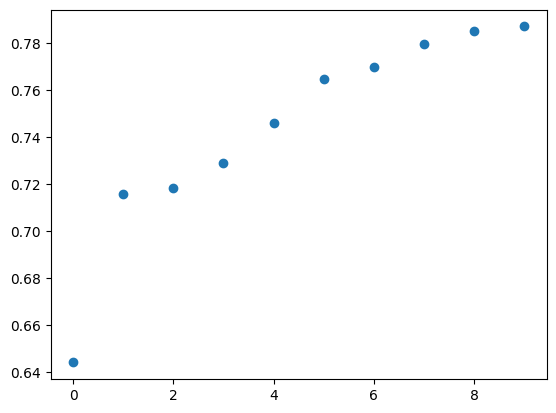

In [196]:
X=train.drop("Transported", axis=1)
y=train["Transported"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
number_of_epochs = 10
history = model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=32, validation_split=0.2)

model.evaluate(X_test, y_test)

plt.scatter(range(number_of_epochs), history.history["accuracy"])
print("Accuracy: ", history.history["accuracy"][-1])

model.save("model.h5")